<a href="https://colab.research.google.com/github/VinayNegi7/CODSOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2: Movie Rating Prediction

In [ ]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode, iplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDb Movies India.csv",encoding='latin-1')

SHOWING TABLE OF DATA

In [ ]:
Data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
Data.shape

(15509, 10)

In [ ]:
Data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


The code defines a function, missing values_percent, which calculates the percentage of missing values in a given dataset using pandas.The result is presented in the DataFrames, ading in the identification and handling of missing data.

In [ ]:
def missing_values_percent(dataframe):
   missing_values= dataframe.isna().sum()
   percentage_missing_values = (missing_values/len(dataframe)*100).round(2)

   result_movie=pd.DataFrame({'Missing Values':missing_values,'Percentage':percentage_missing_values})
   result_movie['Percentage']=result_movie['Percentage'].astype(str)+'%'
   return result_movie

result =missing_values_percent(Data)
print(result)


          Missing Values Percentage
Name                   0       0.0%
Year                 528       3.4%
Duration            8269     53.32%
Genre               1877      12.1%
Rating              7590     48.94%
Votes               7589     48.93%
Director             525      3.39%
Actor 1             1617     10.43%
Actor 2             2384     15.37%
Actor 3             3144     20.27%


Remove the Actor2 and Actor3 coloumn from the DataFrame 'data', drops rows with missing vaues in the 'duration'coloumn and filters out rows with more than 5 missing values in percentage and missing value coloumn

In [ ]:
Data.drop(['Actor 2' , 'Actor 3'], axis=1, inplace=True)
Data.dropna(subset=['Duration'], inplace=True)
Data = Data[Data.isnull().sum(axis=1).sort_values(ascending=False) <= 5]
missing_values_percent(Data)

,Missing Values,Percentage
Name,0,0.0%
Year,125,1.73%
Duration,0,0.0%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


Drops rows with missing values in the Rating' and 'Votes' columns, fills missing values in the 'Director', 'Genre', and 'Actor T' columns with specified values, and generates a DataFrame missing_values_df displaying the count and percentage of missing values for each variable in the dataset. Displays the last few rows of the modified 'Data' DataFrame, providing a glimpse of the dataset after handling missing values and performing column manipulations.

In [ ]:
Data.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = Data['Director'].describe()

director_counts = Data['Director'].value_counts().sort_values(ascending=False)
Data['Director'].fillna('Unknown', inplace=True)

genre_description = Data['Genre'].value_counts().sort_values(ascending=False)
Data['Genre'].fillna('Unknown', inplace=True)

actor1_description = Data['Actor 1'].describe()
Data['Actor 1'].fillna('mahesh babu', inplace=True)

missing_values_df =pd.DataFrame({
    'Missing Values': Data.isnull().sum(),
    'Percentage':(Data.isnull().sum()/len(Data)*100).round(2)
})
Data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra


Again checking the missing values

In [ ]:
missing_values_percent(Data)

,Missing Values,Percentage
Name,0,0.0%
Year,0,0.0%
Duration,0,0.0%
Genre,0,0.0%
Rating,0,0.0%
Votes,0,0.0%
Director,0,0.0%
Actor 1,0,0.0%


Convert the year coloumn in the DataFrame 'Data' to a string, remove parenthesis using regex, and remove the min string from the 'Duration' coloumn in 'Data' using regex

In [ ]:
Data['Year'] = Data['Year'].astype(str).str.replace(r'[()]', '',regex=True)
Data['Duration'] = Data['Duration'].str.replace(r' min','',regex=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


Prints the count of missing values in the 'Duration' column of the DataFrame 'Data'. Fills the missing values in the 'Duration' column with the mean duration and converts the column to integers. Then, prints the count of missing values after the NaN values are handled

In [ ]:
print(Data['Duration'].isnull().sum())

#Fill NaN values with the mean duration
mean_duration= Data['Duration'].mean()
Data['Duration'] = Data['Duration'].fillna(mean_duration).astype(int)

#Check the data after handling NaN values
print(Data['Duration'].isnull().sum())

0
0


In this code Converts the 'Year' and 'Duration' columns in the DataFrame 'Data' to integers. Converts the 'Votes' column to a string, removes commas using regex, and then converts the column to integers. Outputs updated information about the DataFrame 'Data,' reflecting the changes in data types and memory usage after the conversions.

In [ ]:
# Remove all non-digit characters from the 'Year' column
Data['Year'] = Data['Year'].str.replace(r'\D', '', regex=True)


int_columns = ['Year', 'Duration']
Data[int_columns] = Data[int_columns].astype(int)

# Convert "Votes' to string and then replace, and convert to int
Data['Votes'] = Data['Votes'].astype(str).str.replace(",", "").astype(int)

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


Plot using Matplotlib

The plot is titled"Number of Movies per Year" with 'year' on the x-axis and the 'number of Movies' on the y-axis

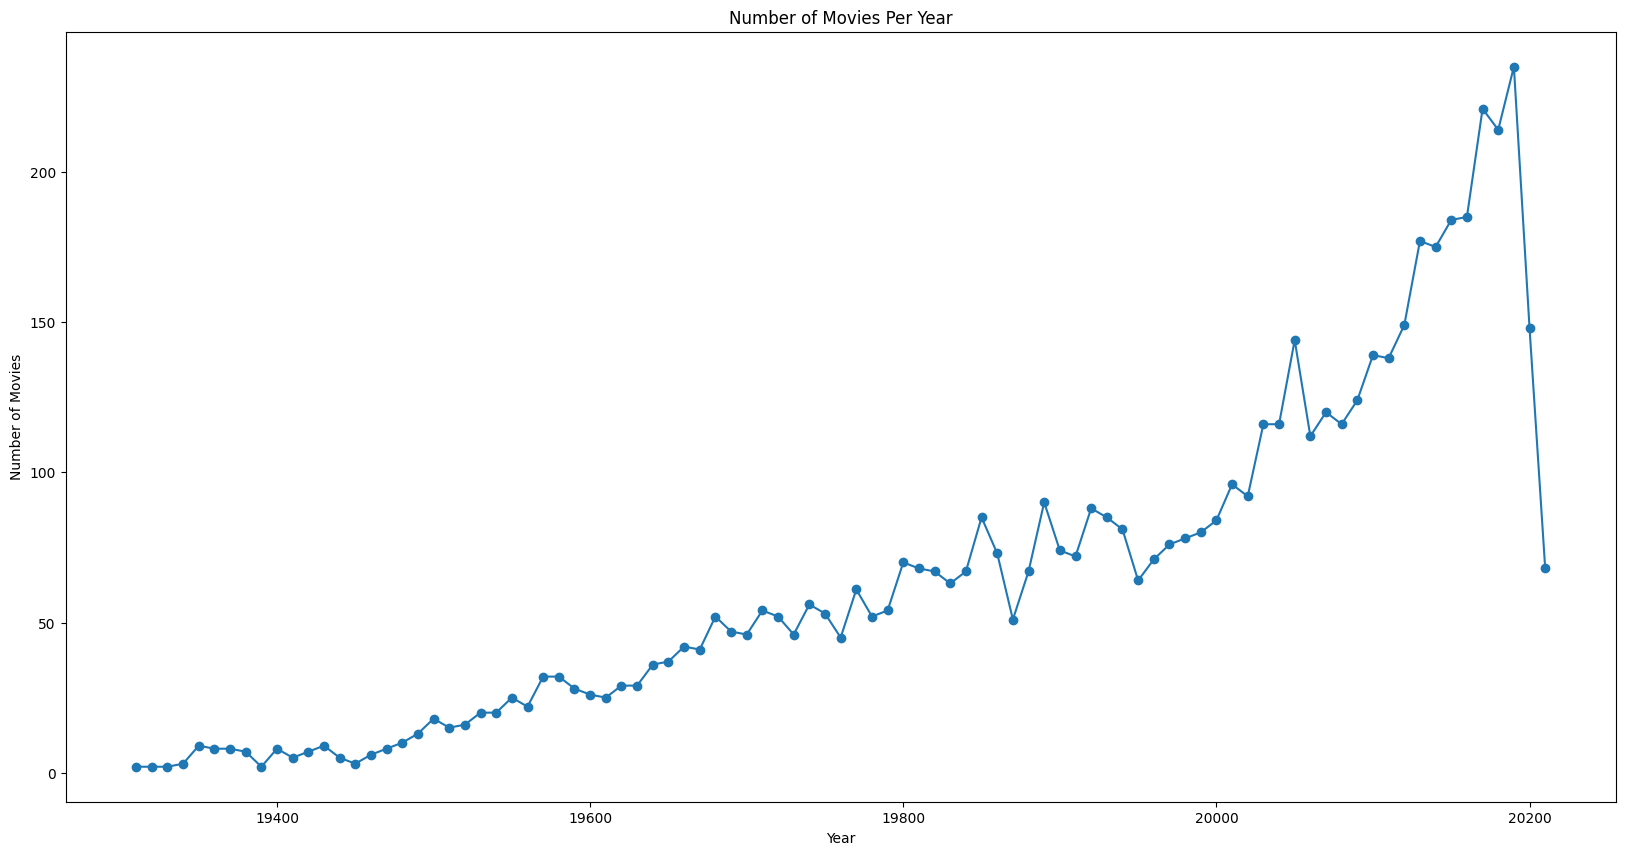

In [ ]:
plt.figure(figsize=(20, 10))

year_counts= Data['Year'].value_counts().sort_index()
years= year_counts.index

plt.plot(years, year_counts, marker='o')

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()


Pie Chart for the data

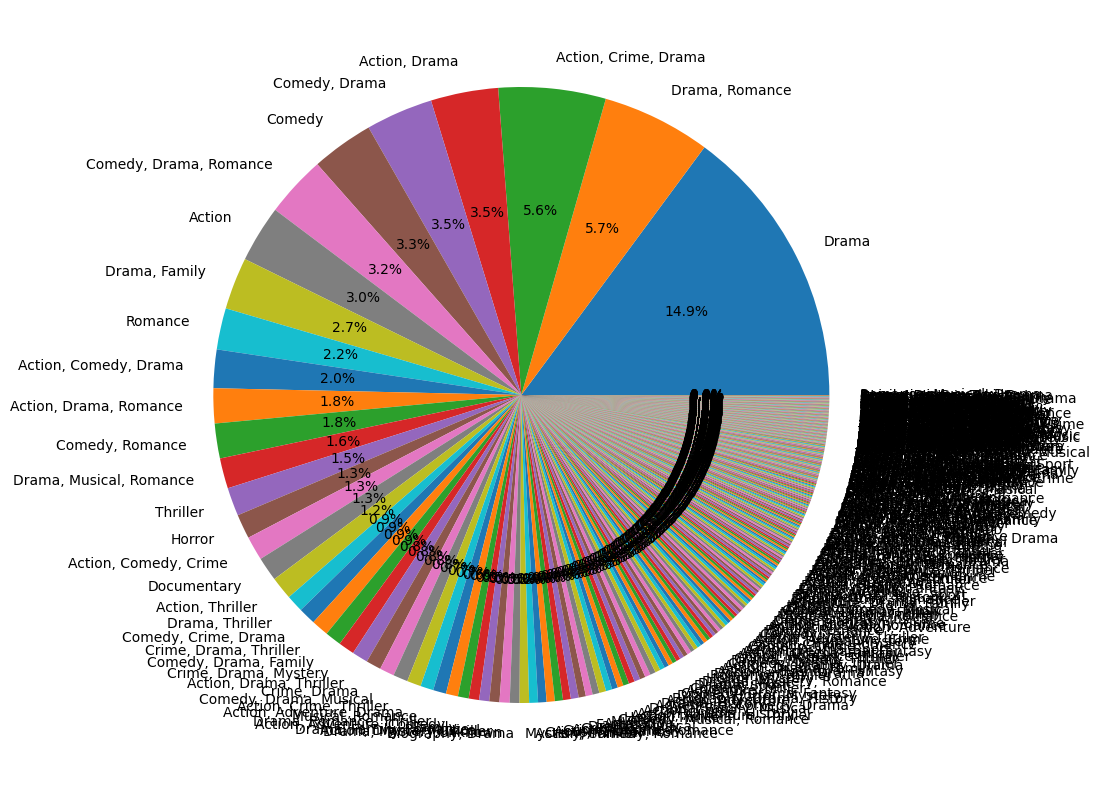

In [ ]:
label = Data["Genre"].value_counts().index
sizes= Data["Genre"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=label, startangle = 0, shadow= False, autopct='%1.1f%%')
plt.show()

In [ ]:
px.scatter(Data,x='Rating',y= 'Votes',color='Rating',title='<b>Rating vs Votes')

In [ ]:
px.scatter(Data,x='Rating',y= 'Duration',color='Rating',title='<b>Rating vs Duration')

Building Model

This code calculates the mean rating for each genre in the "Genre' column of the DataFrame 'Data' and creates a new column named Genre mean_rating' to store these mean values for each corresponding genre in the dataset.


In [ ]:
genre_mean_rating= Data.groupby('Genre') ['Rating'].transform('mean')
Data['Genre_mean_rating']= genre_mean_rating

This code enhances the 'Data' table by adding two new columns, 'Director_encoded and 'Actor_encoded. These columns store average rating values based on the directors and the main actor of each movie. The code then sets up information for a model to predict movie ratings, divides the data into training and testing parts, and teaches a Linear Regression model. It predicts ratings on the test set and assesses the model's accuracy using Mean Squared Error, Mean Absolute Error, and R2 Score, offering a glimpse into how well the model performs.

Mean Squared Error: 0.5205
Mean Absolute Error: 0.5121
R2 Score: 0.7203


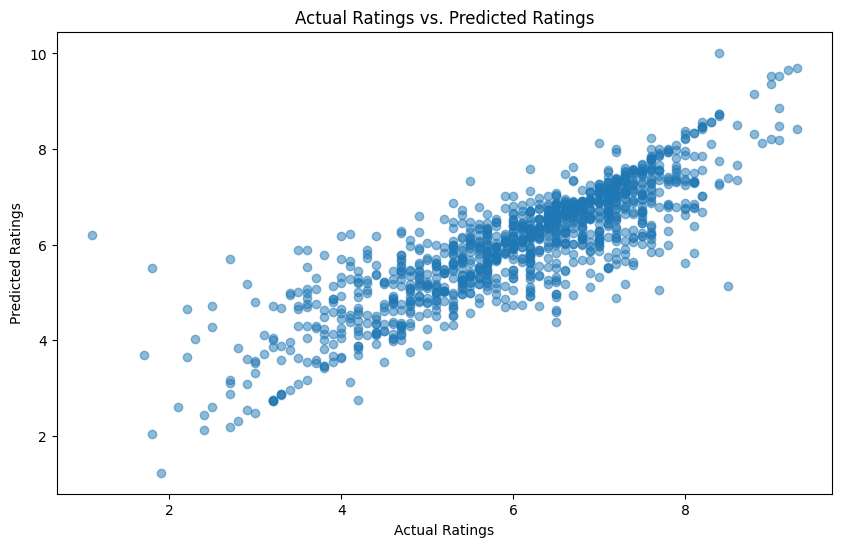

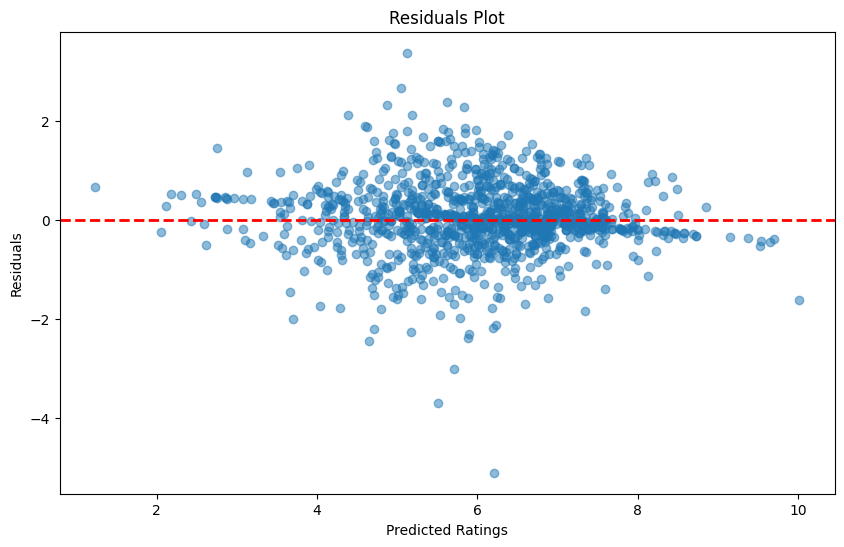

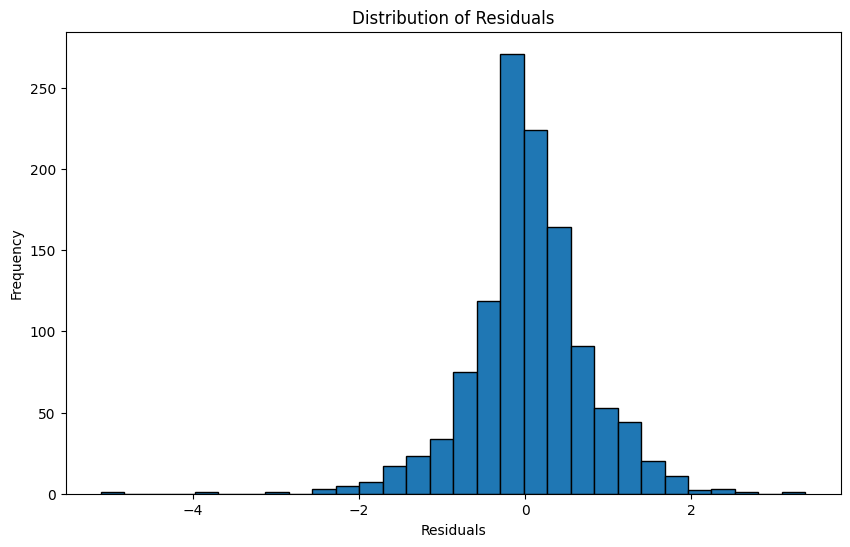

In [ ]:
Data['Director_encoded'] = Data.groupby('Director') ['Rating'].transform('mean')
Data['Actor_encoded'] = Data.groupby('Actor 1')['Rating'].transform('mean')

# Define the features and target variable
features =['Year', 'Votes', 'Duration','Director_encoded', 'Actor_encoded']
X = Data[features]
y = Data['Rating']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
lr= LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test_set
y_pred= lr.predict(X_test)


# Evaluate the model
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

# Print the evaluation metrics

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

# Scatter plot to compare actual vs. predicted ratings in the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual Ratings vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Residual plot to assess model's error distribution

residuals=y_test- y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()


#Distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins= 30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Result

The Mean Squared Error (MSE) of 0.5205 measures how close, on average, the model's predicted movie ratings are to the actual ratings. A lower MSE is better, and in this case, it's considered moderate. The Mean Absolute Error (MAE) of 0.5121, similar to MSE, reffects the closeness of predictions to actual ratings, with a lower value indicating batter accuracy. The R2 Score of 0.7203 indicates that the model explains around 72.03% of the variability in ratings, showing its effectiveness in capturing and predicting patterns. Overall, these metrics suggest your regression model performs reasonably well in predicting movie ratings.

